In [1]:
#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_movie = pd.read_csv("./data/movie.metadata.csv")
df_movie.head()

,Wiki Movie ID,Freebase Movie ID,Movie name,release date,Movie box office revenue,movie runtime,language,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,24-08-01,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,16-02-00,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [8]:
map_dict_to_list = lambda x: [value for key, value in eval(x).items()]
df_movie['language'] = df_movie['language'].apply(map_dict_to_list)
df_movie['countries'] = df_movie['countries'].apply(map_dict_to_list)
df_movie['genre'] = df_movie['genre'].apply(map_dict_to_list)
df_movie.head()

,Wiki Movie ID,Freebase Movie ID,Movie name,release date,Movie box office revenue,movie runtime,language,countries,genre,Cleaned Language
0,975900,/m/03vyhn,Ghosts of Mars,24-08-01,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",English
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,16-02-00,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",English
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",None
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",English
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama],German


In [9]:
df_char = pd.read_csv("./data/character.metadata.csv")
df_char.head()

,Wiki Movie ID,Freebase Movie ID,Movie release date,Character Name,Actor DOB,Gender,Actor Height,Unnamed: 7,Actor Name,Actor age at movie release,Freebase character map,Unnamed: 11,Unnamed: 12
0,975900,/m/03vyhn,24-08-01,Akooshay,26-08-58,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,24-08-01,Lieutenant Melanie Ballard,15-08-74,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,24-08-01,Desolation Williams,15-06-69,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,24-08-01,Sgt Jericho Butler,12-09-67,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,24-08-01,Bashira Kincaid,25-09-77,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [10]:
## Find which actor bring in the highest revenue
# Store data about wiki movie ID, freebase movie ID, Movie name, Movie box office revenue
df_movie_revenue = df_movie[['Wiki Movie ID','Freebase Movie ID','Movie name','Movie box office revenue','language', 'countries','genre']]

# Clean data of movies without box offic revenue
df_movie_revenue = df_movie_revenue.dropna(subset=['Movie box office revenue'])
df_movie_revenue.head()

,Wiki Movie ID,Freebase Movie ID,Movie name,Movie box office revenue,language,countries,genre
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,3600000.0,[English Language],[United States of America],"[Musical, Comedy, Black-and-white]"
13,171005,/m/016ywb,Henry V,10161099.0,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ..."
17,77856,/m/0kcn7,Mary Poppins,102272727.0,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ..."
21,612710,/m/02wjqm,New Rose Hotel,21521.0,[English Language],[United States of America],"[Thriller, Science Fiction, Future noir, Indie..."


In [11]:
# Store data about wiki movie ID, freebase movie ID, Movie name, Movie box office revenue
df_char_revenue = df_char[['Wiki Movie ID','Freebase Movie ID','Character Name','Actor Name','Actor age at movie release','Gender']]
df_char_revenue.head()

,Wiki Movie ID,Freebase Movie ID,Character Name,Actor Name,Actor age at movie release,Gender
0,975900,/m/03vyhn,Akooshay,Wanda De Jesus,42.0,F
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,Natasha Henstridge,27.0,F
2,975900,/m/03vyhn,Desolation Williams,Ice Cube,32.0,M
3,975900,/m/03vyhn,Sgt Jericho Butler,Jason Statham,33.0,M
4,975900,/m/03vyhn,Bashira Kincaid,Clea DuVall,23.0,F


In [13]:
# This generates data on how much box office revenue is being generated by the actors in their lifetime

# Merge the two datas
df_merged = df_char_revenue.merge(df_movie_revenue, on=['Freebase Movie ID'], how='inner')

# Determine the actor and sum the box office revenue
actor_totalRevenue = df_merged.groupby(['Actor Name'])['Movie box office revenue'].agg(['sum', 'count']).reset_index()

actor_totalRevenue.columns = ['Actor Name', 'Movie box office revenue', 'Actor Count']

# Sort the actor_revenue DataFrame in descending order
actor_revenue_sort = actor_totalRevenue.sort_values(by='Movie box office revenue', ascending=False)

actor_top10 = actor_revenue_sort.head(10)

# Merge the top 10 actors with original datas
top10_actor_data = actor_top10.merge(df_char_revenue[['Actor Name', 'Gender']], on='Actor Name', how='left')
top10_actor_data = actor_top10.merge(df_merged[['Actor Name', 'language']], on='Actor Name', how='left')
top10_actor_data = top10_actor_data.drop_duplicates(subset = ['Actor Name'])
top10_actor_data.head()

,Actor Name,Movie box office revenue,Actor Count,language
0,Warwick Davis,1.293016e+10,19,"[Croatian language, English Language]"
19,Samuel L. Jackson,1.278943e+10,72,"[Russian Language, English Language]"
91,Frank Welker,1.028744e+10,61,"[English Language, Spanish Language]"
152,Alan Rickman,1.020871e+10,29,"[Croatian language, English Language]"
181,Robbie Coltrane,1.009465e+10,30,"[Croatian language, English Language]"


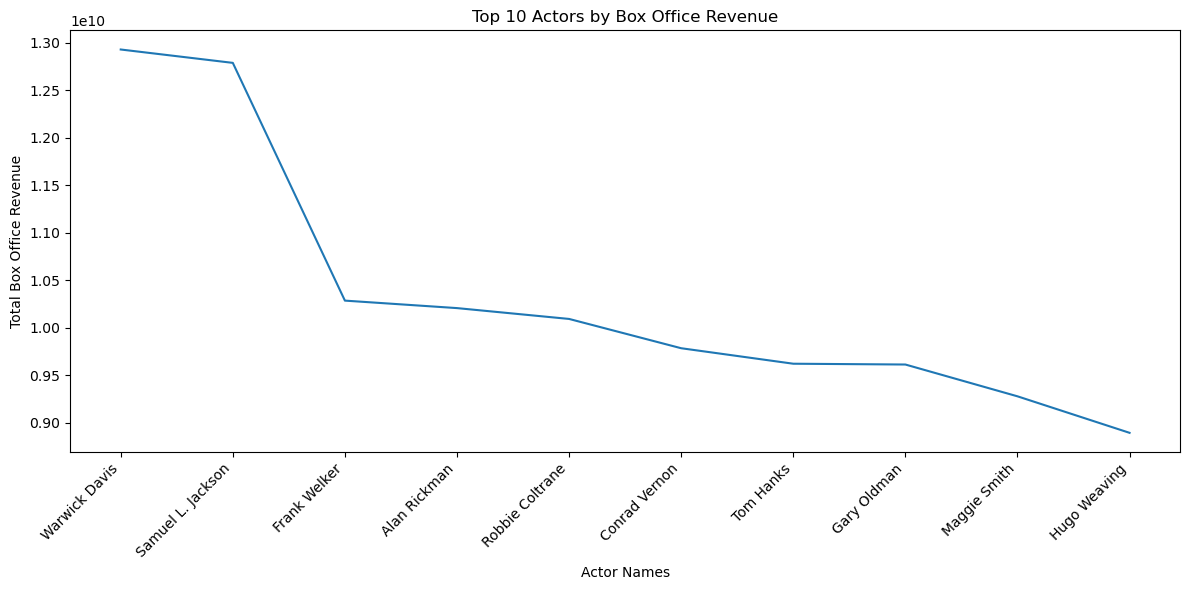

In [15]:
# Plot the data above
actor_names = top10_actor_data['Actor Name']
revenues_total = top10_actor_data['Movie box office revenue']

plt.figure(figsize=(12, 6))
plt.plot(actor_names, revenues_total)
plt.xlabel('Actor Names')
plt.ylabel('Total Box Office Revenue')
plt.title('Top 10 Actors by Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.tight_layout()
plt.show()

# In the data below, we are ranking the actors according to the box office revenue of the movies they acted in.

In [21]:
###### Study the main lead actors obtaining the highest revenue - extract from plot summaries\n",
# Characters names extracted from plot smmaries, highly associated to be a main character.\n",
characters =  pd.read_csv(
    'data/character_attributes_lemmatized.csv', 
    index_col=0,
    converters={
        "adj": lambda x: x.strip("[]").replace("'","").split(", "), # need this to read list columns from csv
        "active": lambda x: x.strip("[]").replace("'","").split(", "),
        "patient": lambda x: x.strip("[]").replace("'","").split(", ")
        }
    )

characters_only = characters['character']
characters_only.head()

0                  Snow
1    Haymitch Abernathy
2          Seneca Crane
3                   Rue
4     Primrose Everdeen
Name: character, dtype: object

In [34]:
df_charac_actor = df_merged[['Character Name','Actor Name','Movie box office revenue']]

# Include characters and actors together in the same dataset
character_actor = df_charac_actor.merge(df_char_revenue[['Actor Name', 'Character Name']], on='Actor Name', how='left')

# Drop actor data that do not have character data
df_charac_actor = df_charac_actor.dropna(subset=['Character Name'])
df_charac_actor

,Character Name,Actor Name,Movie box office revenue
0,Akooshay,Wanda De Jesus,14010832.0
1,Lieutenant Melanie Ballard,Natasha Henstridge,14010832.0
2,Desolation Williams,Ice Cube,14010832.0
3,Sgt Jericho Butler,Jason Statham,14010832.0
4,Bashira Kincaid,Clea DuVall,14010832.0
...,...,...,...
101020,Joey Friedlander,Art Carney,5400000.0
101021,Lady Angela St. Simeon,Moira Lister,5400000.0
101022,Assistant Car Salesman,Lance Percival,5400000.0
101023,Norwood,Roland Culver,5400000.0


In [35]:
# Merge only the main charac of movies\n",
main_charac = df_charac_actor [df_charac_actor['Character Name'].isin(characters_only)]
main_charac

#Add up the Box office revenue and count the occurance of movie appearance
main_charac_mergedBOR = df_merged.groupby(['Actor Name'])['Movie box office revenue'].agg(['sum', 'count']).reset_index()

main_charac_sort = main_charac_mergedBOR.sort_values(by='sum', ascending=False)

main_charac_top20 = main_charac_sort.head(20)
main_charac_top20

,Actor Name,sum,count
36323,Warwick Davis,1.293016e+10,19
31450,Samuel L. Jackson,1.278943e+10,72
11417,Frank Welker,1.028744e+10,61
623,Alan Rickman,1.020871e+10,29
29936,Robbie Coltrane,1.009465e+10,30
6863,Conrad Vernon,9.786402e+09,17
34928,Tom Hanks,9.623361e+09,47
11845,Gary Oldman,9.614965e+09,36
22637,Maggie Smith,9.280352e+09,29
13899,Hugo Weaving,8.896132e+09,24


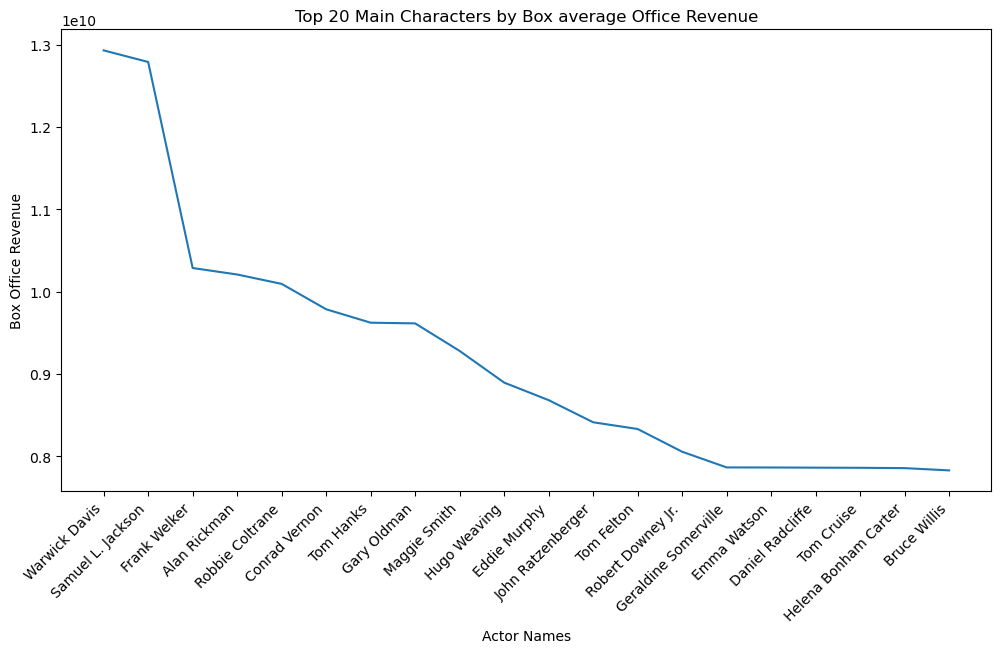

In [25]:
# Plot the charts for main actors\n",
main_charac_top20_names = main_charac_top20['Actor Name']
main_charac_revenue = main_charac_top20['sum']

plt.figure(figsize=(12, 6))
plt.plot(main_charac_top20_names,main_charac_revenue)
plt.xlabel('Actor Names')
plt.ylabel('Box Office Revenue')
plt.title('Top 20 Main Characters by Box average Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.show()

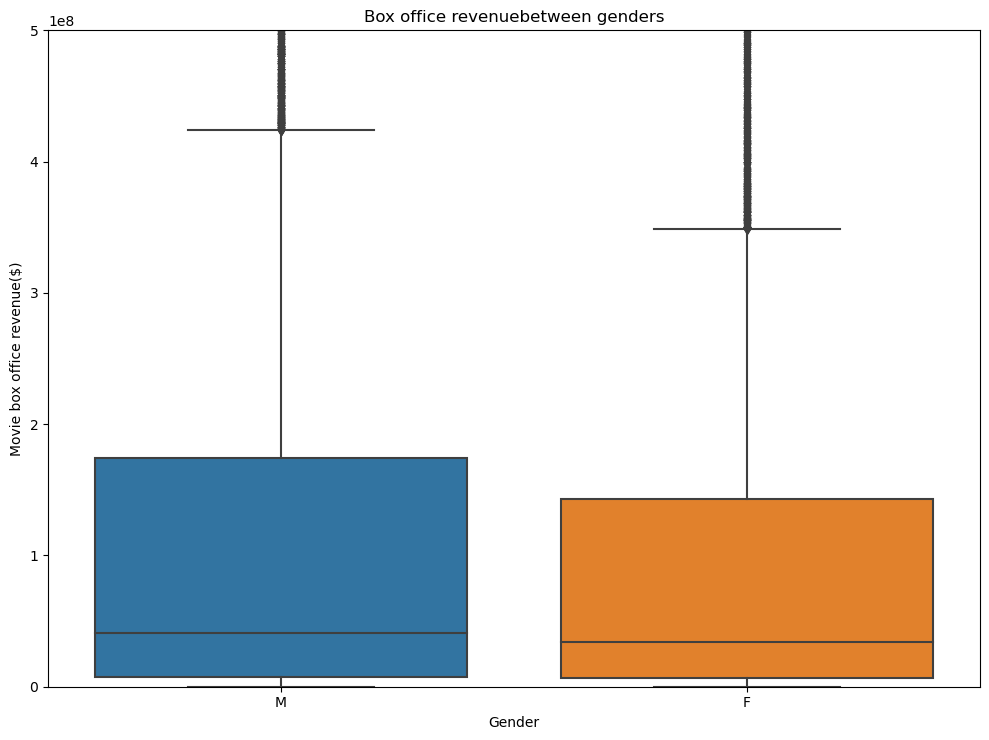

In [28]:
# Gender data\n",
# Include gender into the data for box plot aalysis
gender_actor_data = actor_revenue_sort.merge(df_char_revenue[['Actor Name', 'Gender']], on='Actor Name', how='left')
gender_actor_data = gender_actor_data.drop_duplicates(subset = ['Actor Name'])

# Box plot for revenue between genders
plt.figure(figsize=(10, 7.5))
gender_boxplot = sns.boxplot(x="Gender", y="Movie box office revenue", data=gender_actor_data.loc[gender_actor_data['Gender'].isin(['M','F'])])

# Set labels
plt.ylabel("Movie box office revenue($)")
plt.title("Box office revenuebetween genders")
plt.ylim(0, 500000000)
          
#Show plot
plt.tight_layout()
plt.show()

# Given the variance and the 25th percentile, 75th percentile and medan, male actors drive higher box office revenue."

In [29]:
#-----------language------------
# Study the language used in top 50 films / Which language drive the highest revenue?
film_sort = df_movie_revenue.sort_values(by='Movie box office revenue', ascending=False)
top100film = film_sort.head(100)
top100film.head()

,Wiki Movie ID,Freebase Movie ID,Movie name,Movie box office revenue,language,countries,genre
23702,4273140,/m/0bth54,Avatar,2.782275e+09,"[English Language, Spanish Language]","[United States of America, United Kingdom]","[Thriller, Science Fiction, Adventure, Compute..."
22256,52371,/m/0dr_4,Titanic,2.185372e+09,"[Italian Language, English Language, French La...",[United States of America],"[Tragedy, Costume drama, Historical fiction, A..."
28192,22114132,/m/062zm5h,The Avengers,1.511758e+09,"[Russian Language, English Language]",[United States of America],"[Science Fiction, Action]"
30278,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,1.328111e+09,[English Language],"[United States of America, United Kingdom]","[Drama, Mystery, Fantasy, Adventure]"
18645,25001260,/m/0872p_c,Transformers: Dark of the Moon,1.123747e+09,[English Language],[United States of America],"[Alien Film, Science Fiction, Action, Adventure]"


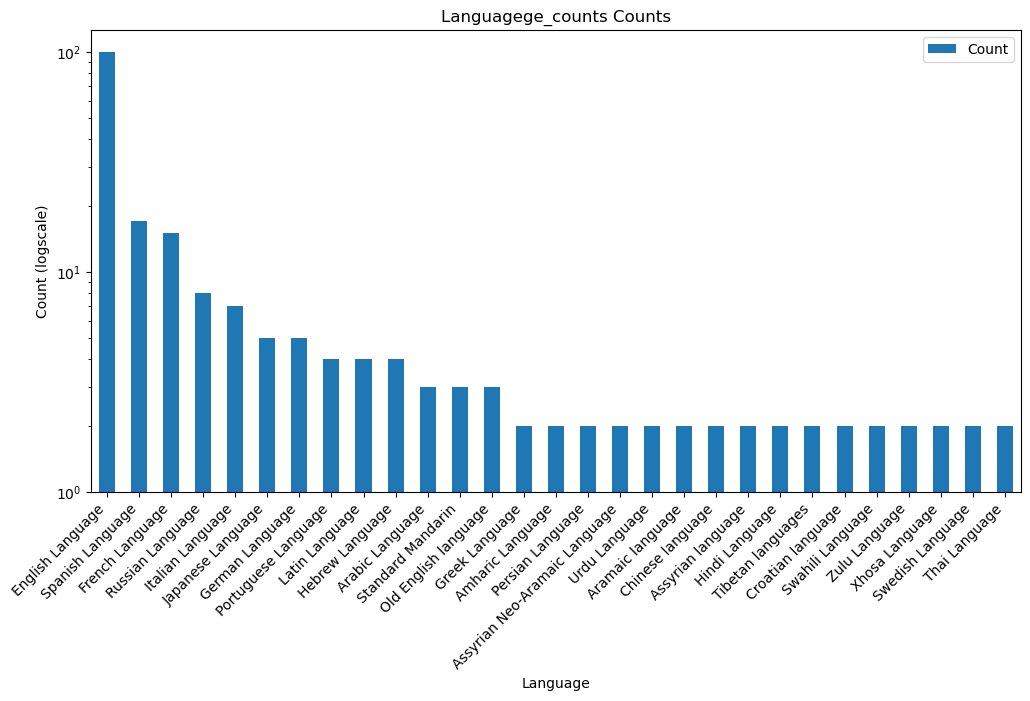

In [31]:
# Take top 100 earning movies, count the languages used in the movies
# Split the language into new data frames\
df_split_languages = top100film.explode('language')

# Count the occurance of the languages
language_counts = df_split_languages['language'].value_counts()
df_language_counts = pd.DataFrame({'Language': language_counts.index, 'Count': language_counts.values})

# Plot the data
df_language_counts.plot(kind='bar', x='Language', y='Count', figsize=(12, 6),log=True)
plt.title('Languagege_counts Counts')
plt.xlabel('Language')
plt.ylabel('Count (logscale)')
plt.xticks(rotation=45, ha='right')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Thriller'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Action/Adventure'),
  Text(6, 0, 'Fantasy'),
  Text(7, 0, 'Romance Film'),
  Text(8, 0, 'Family Film'),
  Text(9, 0, 'Science Fiction')])

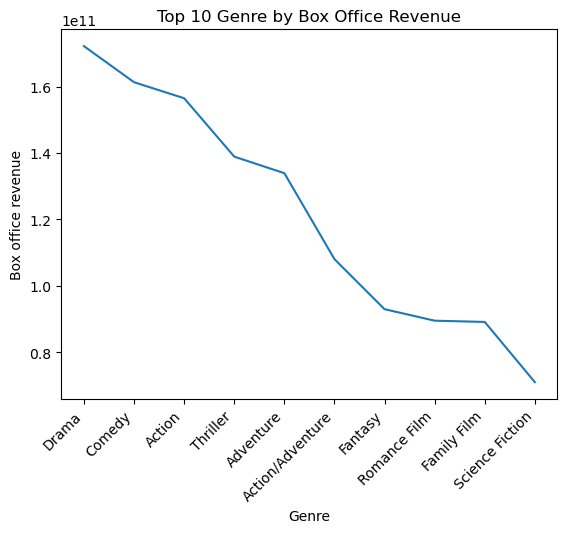

In [32]:
# Study the types of movies that earn the highest revenue
# Split the genre into new data frames
df_split_genre = df_movie_revenue.explode('genre')[['Movie name', 'Movie box office revenue', 'genre']]

# Determine the actor and sum the box office revenue
genre_totalRevenue = df_split_genre.groupby('genre')['Movie box office revenue'].sum().reset_index()

# Sort the BOR in ascending order
genre_totalRevenue = genre_totalRevenue.sort_values(by='Movie box office revenue', ascending=False)
genre_totalRevenue_top10 = genre_totalRevenue.head(10)

genre = genre_totalRevenue_top10['genre']
genreRevenue = genre_totalRevenue_top10['Movie box office revenue']

#Plot the charts
plt.plot(genre, genreRevenue)
plt.xlabel('Genre')
plt.ylabel('Box office revenue')
plt.title('Top 10 Genre by Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

In [ ]:
# Can older folks still drive in good revenue in cinema?
# Look into how age can affect the role the actors play in? And how much money they are able to drive in?
# Account for inflation among countries?